<a href="https://colab.research.google.com/github/Rakeshyrc/CUSTOMER-CHURN-PREDICTIVE-/blob/main/CHURN_PREDICTIVE_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
#  Importing data
DATA_= pd.read_csv('/content/dataset12M.csv')
DATA_.head()


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom


In [ ]:
# Convert InvoiceDate to datetime
DATA_['InvoiceDate'] = pd.to_datetime(DATA_['InvoiceDate'])

# Create a function that truncates a date object to the first day of the month
def get_month(x): return dt.datetime(x.year, x.month, 1)

# Apply the function to the InvoiceDate column and create a new column called InvoiceMonth
DATA_['InvoiceMonth'] = DATA_['InvoiceDate'].apply(get_month)

# Group by CustomerID and select values of InvoiceMonth
grouping = DATA_.groupby('CustomerID')['InvoiceMonth']

# Use transform() along with min() to assign the earliest InvoiceMonth value to each customer
# CohortMonth is the month of the customer's first purchase
DATA_['CohortMonth'] = grouping.transform('min')

# Check the first 5 columns
DATA_.head()


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom,2011-05-01,2011-02-01


In [ ]:
# Calculate time offset
# Create a function to extract integer values for years, months, and days
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Calculate the number of months between the first and last transaction for each customer
invoice_year, invoice_month, _ = get_date_int(DATA_, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(DATA_, 'CohortMonth')

# Calculate the difference in years
years_diff = invoice_year - cohort_year

# Calculate the difference in months
months_diff = invoice_month - cohort_month

# Convert CohortMonth to 'date' format
DATA_['CohortMonth'] = pd.to_datetime(DATA_['CohortMonth']).dt.date

# Extract the difference in months from the first transaction/acquisition per customer
DATA_['CohortIndex'] = years_diff * 12 + months_diff
DATA_.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom,2011-10-01,2011-04-01,6
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom,2011-11-01,2011-09-01,2
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom,2011-07-01,2011-07-01,0
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom,2011-11-01,2011-11-01,0
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom,2011-05-01,2011-02-01,3


In [ ]:
# Create DataFrame 'grouping' to group data based on CohortMonth and CohortIndex
grouping = DATA_.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique values per CustomerID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot table
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,383.0,149.0,145.0,156.0,165.0,180.0,160.0,147.0,154.0,160.0,150.0,208.0,113.0
2011-01-01,429.0,109.0,134.0,123.0,161.0,139.0,126.0,130.0,160.0,146.0,180.0,77.0,NaN
2011-02-01,352.0,67.0,67.0,94.0,97.0,85.0,91.0,98.0,100.0,113.0,36.0,NaN,NaN
2011-03-01,422.0,67.0,113.0,88.0,91.0,74.0,113.0,94.0,122.0,44.0,NaN,NaN,NaN
2011-04-01,279.0,61.0,60.0,59.0,58.0,59.0,67.0,70.0,18.0,NaN,NaN,NaN,NaN
2011-05-01,267.0,41.0,47.0,41.0,55.0,62.0,68.0,25.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,214.0,33.0,27.0,43.0,49.0,64.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,185.0,29.0,33.0,42.0,47.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,145.0,30.0,30.0,36.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Select the first column and save it as cohort_sizes
cohort_sizes = cohort_counts.iloc[:, 0]

# Divide cohort_counts by cohort_sizes for all rows
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.9,37.9,40.7,43.1,47.0,41.8,38.4,40.2,41.8,39.2,54.3,29.5
2011-01-01,100.0,25.4,31.2,28.7,37.5,32.4,29.4,30.3,37.3,34.0,42.0,17.9,NaN
2011-02-01,100.0,19.0,19.0,26.7,27.6,24.1,25.9,27.8,28.4,32.1,10.2,NaN,NaN
2011-03-01,100.0,15.9,26.8,20.9,21.6,17.5,26.8,22.3,28.9,10.4,NaN,NaN,NaN
2011-04-01,100.0,21.9,21.5,21.1,20.8,21.1,24.0,25.1,6.5,NaN,NaN,NaN,NaN
2011-05-01,100.0,15.4,17.6,15.4,20.6,23.2,25.5,9.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.4,12.6,20.1,22.9,29.9,8.9,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,15.7,17.8,22.7,25.4,10.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,20.7,24.8,10.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


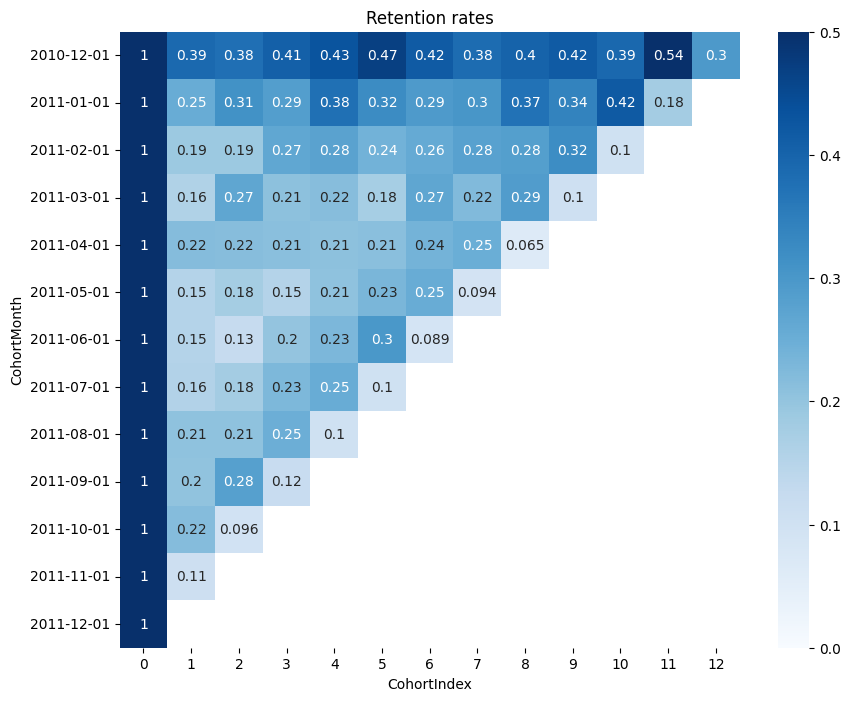

In [ ]:
# Visualize retention rates as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,
            annot=True,
            vmin=0.0,
            vmax=0.5,
            cmap='Blues')
plt.show()


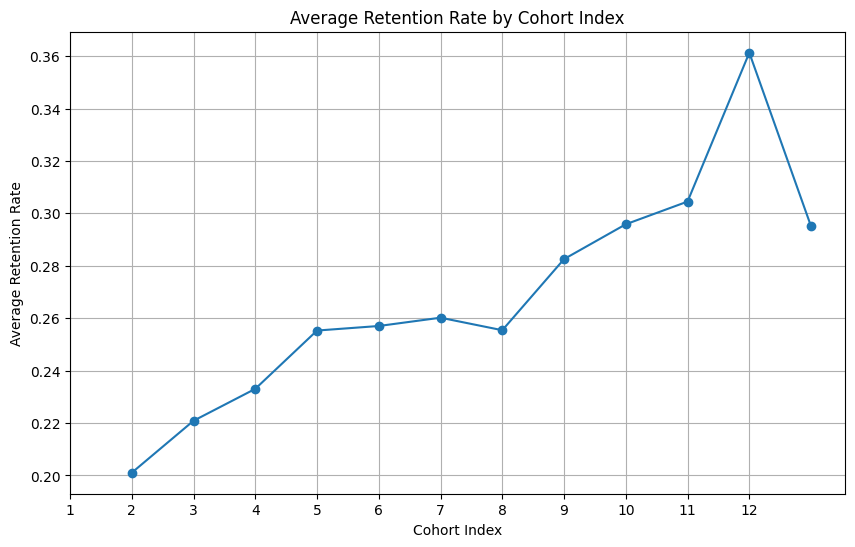

In [ ]:
import numpy as np

# Calculate the mean retention rate for each CohortIndex
average_retention = retention.mean(axis=0)

# Exclude CohortIndex 0 because this is where we got first transaction from customer
average_retention = average_retention[1:]

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_retention.index, average_retention.values, marker='o')
plt.xlabel('Cohort Index')
plt.ylabel('Average Retention Rate')
plt.title('Average Retention Rate by Cohort Index')
plt.xticks(np.arange(len(average_retention.index)), average_retention.index)
plt.grid(True)
plt.show()


FROM ABOVE PLOTS WE CAN FIND
The retention rate appears to decrease with increasing cohort index(since 0 or initial index), indicating that customers tend to be less engaged and make fewer repeat purchases over time.
Cohort 0 has the highest retention rate since it represents the initial cohort where all customers made their first transactions.
After cohort 0, the retention rate drops initially but shows a relatively stable pattern afterward, suggesting that customers who remain engaged tend to maintain their level of activity.
Monitoring retention rates by cohort index can help identify trends and assess the effectiveness of customer retention strategies over time. It is crucial to focus on strategies to retain customers beyond the initial cohort to ensure sustained business growth.

2. Preprocess Data

In [ ]:
# Print the minimum and maximum dates in the 'InvoiceDate' column
print('Min: {}; Max: {}'.format(min(DATA_.InvoiceDate), max(DATA_.InvoiceDate)))
DATA_.head()


Min: 2010-12-10 00:00:00; Max: 2011-12-09 00:00:00


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom,2011-10-01,2011-04-01,6
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom,2011-11-01,2011-09-01,2
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom,2011-07-01,2011-07-01,0
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom,2011-11-01,2011-11-01,0
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom,2011-05-01,2011-02-01,3


# **RFM**

In [ ]:
# Create the 'TotalSum' column
DATA_['TotalSum'] = DATA_['Quantity'] * DATA_['UnitPrice']

# Convert 'InvoiceDate' to the 'datetime' format
DATA_['InvoiceDate'] = pd.to_datetime(DATA_['InvoiceDate'])

# Create 'snapshot_date' to select the most recent date in the entire dataset and add 1 to simulate the day of analysis
snapshot_date = max(DATA_['InvoiceDate']) + dt.timedelta(days=1)

# Group the data by 'CustomerID'
datamart = DATA_.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Days between the analysis date and the most recent 'InvoiceDate' per customer
    'InvoiceNo': 'count',  # Number of invoices (transactions) per customer
    'TotalSum': 'sum'  # Total monetary value (spending) per customer
})

# Rename columns for easy interpretation
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

# Datamart is a table where each row represents a customer with their recency, frequency, and monetary value up to the analysis day.
datamart.head()


,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,3,25,948.70
12748,1,888,7046.16
12749,4,37,813.45
12820,4,17,268.02
12822,71,9,146.15


In [ ]:
r_labels = range(4, 0, -1)  # Customers who have been more recent will be better than less recent ones
f_labels = range(1, 5)
m_labels = range(1, 5)


In [ ]:
r_groups = pd.qcut(datamart['Recency'], q=4, labels=r_labels)
f_groups = pd.qcut(datamart['Frequency'], q=4, labels=f_labels)
m_groups = pd.qcut(datamart['MonetaryValue'], q=4, labels=m_labels)


In [ ]:
datamart = datamart.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)

In [ ]:
# Convert 'R', 'F', and 'M' columns to numeric data types (integer)
datamart['R'] = datamart['R'].astype(int)
datamart['F'] = datamart['F'].astype(int)
datamart['M'] = datamart['M'].astype(int)

# Calculate RFM scores using the modified formula
datamart['RFM_Score'] = 0.5 * datamart['R'] + 0.3 * datamart['F'] + 0.2 * datamart['M']

# Create the 'RFM_Decile' column with unique bin edges using 'duplicates' parameter
datamart['RFM_Decile'] = pd.qcut(datamart['RFM_Score'], q=10, labels=False, duplicates='drop')
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Decile
CustomerID,,,,,,,,
12747,3,25,948.70,4,4,4,4.0,8
12748,1,888,7046.16,4,4,4,4.0,8
12749,4,37,813.45,4,4,4,4.0,8
12820,4,17,268.02,4,3,3,3.5,7
12822,71,9,146.15,2,2,3,2.2,3
...,...,...,...,...,...,...,...,...
18280,278,2,38.70,1,1,1,1.0,0
18281,181,2,31.80,1,1,1,1.0,0
18282,8,2,30.70,4,1,1,2.5,4


In [ ]:
# Define the threshold for churn based on 'RFM_Decile'
churn_threshold = 4

# Create the 'Churn' column based on the 'RFM_Decile' threshold
datamart['Churn'] = (datamart['RFM_Decile'] <= churn_threshold).astype(int)

# Print the DataFrame to check the updated columns
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Decile,Churn
CustomerID,,,,,,,,,
12747,3,25,948.70,4,4,4,4.0,8,0
12748,1,888,7046.16,4,4,4,4.0,8,0
12749,4,37,813.45,4,4,4,4.0,8,0
12820,4,17,268.02,4,3,3,3.5,7,0
12822,71,9,146.15,2,2,3,2.2,3,1
...,...,...,...,...,...,...,...,...,...
18280,278,2,38.70,1,1,1,1.0,0,1
18281,181,2,31.80,1,1,1,1.0,0,1
18282,8,2,30.70,4,1,1,2.5,4,1


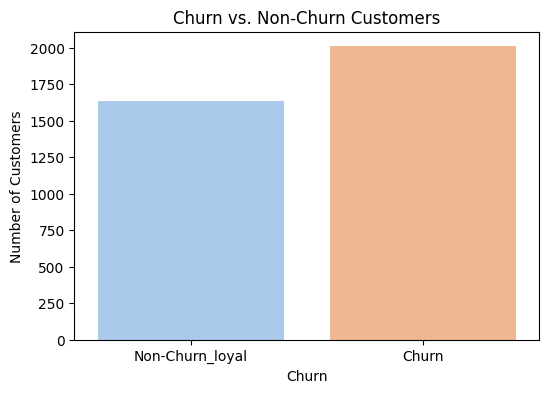

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of churned and non-churned customers
churn_counts = datamart['Churn'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='pastel')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('Churn vs. Non-Churn Customers')
plt.xticks([1, 0], ['Churn','Non-Churn_loyal'])
plt.show()

In [ ]:
def map_churn_segment(x):
    if x in [0, 1]:
        return 'At_risk'
    elif x in [2, 3]:
        return 'Potential'
    elif x in [4, 5]:
        return 'Loyal'
    elif x in [6, 7]:
        return 'Promising'
    elif x == 8:
        return 'Champions'
    else:
        return 'other'

datamart['Churn_Segment'] = datamart['RFM_Decile'].apply(map_churn_segment)

import plotly.express as px

churn_segment_counts = datamart['Churn_Segment'].value_counts().reset_index()
churn_segment_counts.columns = ['Churn_Segment', 'Count']

# Calculate percentage distribution
churn_segment_counts['Percentage'] = (churn_segment_counts['Count'] / churn_segment_counts['Count'].sum()) * 100
churn_segment_counts['Percentage'] = churn_segment_counts['Percentage'].round(2).astype(str) + '%'

fig = px.treemap(churn_segment_counts,
                 path=['Churn_Segment'],
                 values='Count',
                 title='Churn Segment Distribution',
                 color='Count',
                 color_continuous_scale='Blues',
                 hover_data=['Percentage'])

# Update tooltip text to display label and percentage
fig.update_traces(textinfo='label+percent root')

# Adjust figsize
fig.update_layout(width=800, height=480)

fig.show()


The above plot indicates that a significant portion of the customer base consists of loyal and engaged customers ("Champions" and "Loyal"). However, there is a need to focus on the "At_risk" segment and explore strategies to retain these customers. Additionally, efforts can be directed towards converting the "Potential" customers into more loyal ones, as they show promising engagement levels. Understanding and targeting these segments appropriately can help in optimizing marketing and retention strategies.

In [ ]:
# Group customers by 'RFM_Score' and 'Churn', and count churn and non-churn customers
score_wise_churn_counts = datamart.groupby(['RFM_Score', 'Churn']).size().unstack()

# Add a column for the total count of customers in each RFM_Score category
score_wise_churn_counts['Total'] = score_wise_churn_counts.sum(axis=1)

# Rename the columns for better readability
score_wise_churn_counts.rename(columns={0: 'Non-Churn', 1: 'Churn'}, inplace=True)

# Display the count of churn and non-churn customers score-wise based on RFM_Score
print(score_wise_churn_counts)


Churn      Non-Churn  Churn  Total
RFM_Score                         
1.0              NaN  345.0  345.0
1.2              NaN  105.0  105.0
1.3              NaN   63.0   63.0
1.4              NaN   42.0   42.0
1.5              NaN  286.0  286.0
1.6              NaN   17.0   17.0
1.6              NaN   16.0   16.0
1.7              NaN  124.0  124.0
1.8              NaN   47.0   47.0
1.8              NaN   28.0   28.0
1.9              NaN    1.0    1.0
1.9              NaN   35.0   35.0
2.0              NaN  300.0  300.0
2.1              NaN   39.0   39.0
2.2              NaN  140.0  140.0
2.3              NaN   61.0   61.0
2.3              NaN   43.0   43.0
2.4              NaN   29.0   29.0
2.5              NaN  288.0  288.0
2.6             39.0    NaN   39.0
2.7             36.0    NaN   36.0
2.7            108.0    NaN  108.0
2.8             58.0    NaN   58.0
2.8             47.0    NaN   47.0
2.9              9.0    NaN    9.0
2.9             14.0    NaN   14.0
3.0            257.0

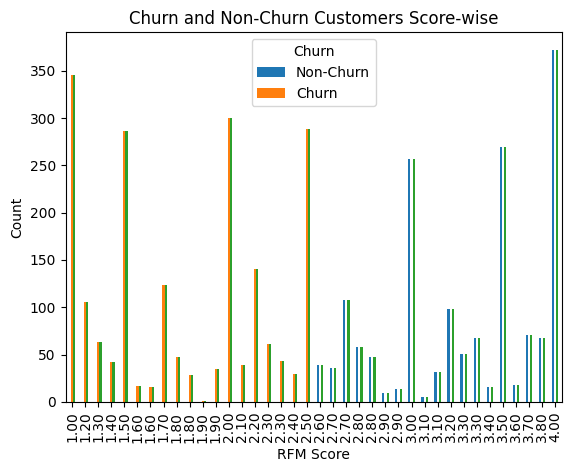

In [ ]:
import matplotlib.pyplot as plt

# Plot the stacked bar chart
ax = score_wise_churn_counts.plot(kind='bar')

# Customize the x-axis labels
x_labels = [f'{float(score):.2f}' for score in score_wise_churn_counts.index]
ax.set_xticklabels(x_labels, rotation=0)

plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.title('Churn and Non-Churn Customers Score-wise')
plt.legend(title='Churn', labels=['Non-Churn','Churn'])
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Group customers by their RFM score deciles and count churn and non-churn customers
score_wise_counts = datamart.groupby(['RFM_Decile', 'Churn']).size().unstack()

# Add a column for the total count of customers in each score decile
score_wise_counts['Total'] = score_wise_counts.sum(axis=1)

# Rename the columns for better readability
score_wise_counts.rename(columns={0: 'Non-Churn', 1: 'Churn'}, inplace=True)

# Display the count of churn and non-churn customers score-wise
print(score_wise_counts)

Churn       Non-Churn  Churn  Total
RFM_Decile                         
0                 NaN  450.0  450.0
1                 NaN  391.0  391.0
2                 NaN  268.0  268.0
3                 NaN  479.0  479.0
4                 NaN  421.0  421.0
5               183.0    NaN  183.0
6               385.0    NaN  385.0
7               538.0    NaN  538.0
8               528.0    NaN  528.0


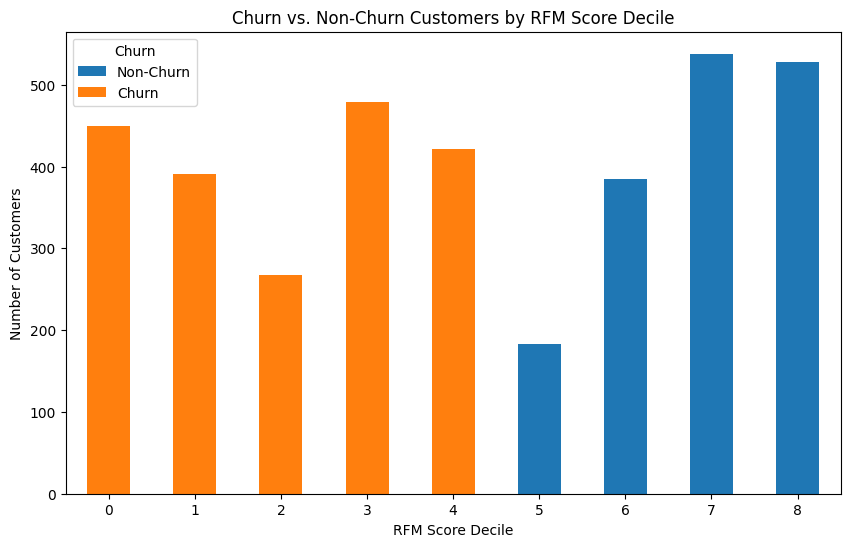

In [ ]:
import matplotlib.pyplot as plt

# Group customers by their RFM score deciles and count churn and non-churn customers
score_wise_counts = datamart.groupby(['RFM_Decile', 'Churn']).size().unstack()

# Add a column for the total count of customers in each score decile
score_wise_counts['Total'] = score_wise_counts.sum(axis=1)

# Rename the columns for better readability
score_wise_counts.rename(columns={0: 'Non-Churn', 1: 'Churn'}, inplace=True)

# Plot the count of churn and non-churn customers score-wise
score_wise_counts[['Non-Churn', 'Churn']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('RFM Score Decile')
plt.ylabel('Number of Customers')
plt.title('Churn vs. Non-Churn Customers by RFM Score Decile')
plt.legend(title='Churn', loc='upper left', labels=['Non-Churn', 'Churn'])
plt.xticks(rotation=0)
plt.show()

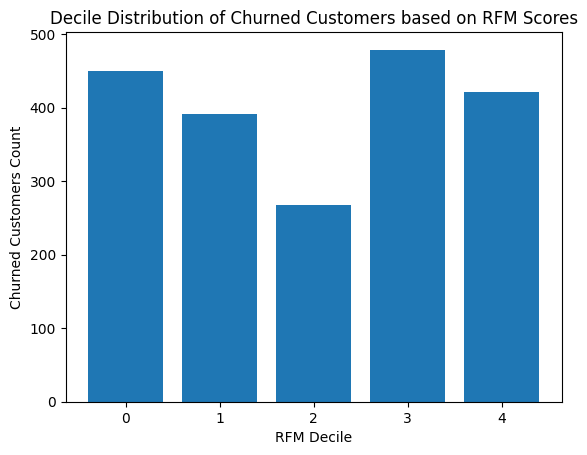

In [ ]:
churned_customers = datamart[datamart['Churn'] == 1]
decile_counts = churned_customers['RFM_Decile'].value_counts().sort_index()

plt.bar(decile_counts.index, decile_counts.values)
plt.xlabel('RFM Decile')
plt.ylabel('Churned Customers Count')
plt.title('Decile Distribution of Churned Customers based on RFM Scores')
plt.show()


In [ ]:
print(datamart.columns)

Index(['Recency', 'Frequency', 'MonetaryValue', 'R', 'F', 'M', 'RFM_Score',
       'RFM_Decile', 'Churn', 'Churn_Segment'],
      dtype='object')


In [ ]:
# Convert 'R', 'F', and 'M' columns to string data types
datamart['R'] = datamart['R'].astype(str)
datamart['F'] = datamart['F'].astype(str)
datamart['M'] = datamart['M'].astype(str)

# Concatenate 'R', 'F', and 'M' columns to create the 'RFM_Segment' column
datamart['RFM_Segment'] = datamart['R'] + datamart['F'] + datamart['M']

# Now, let's check the DataFrame to see if the 'RFM_Segment' column is created
print(datamart.head())


            Recency  Frequency  MonetaryValue  R  F  M  RFM_Score  RFM_Decile  \
CustomerID                                                                      
12747             3         25         948.70  4  4  4        4.0           8   
12748             1        888        7046.16  4  4  4        4.0           8   
12749             4         37         813.45  4  4  4        4.0           8   
12820             4         17         268.02  4  3  3        3.5           7   
12822            71          9         146.15  2  2  3        2.2           3   

            Churn Churn_Segment RFM_Segment  
CustomerID                                   
12747           0     Champions         444  
12748           0     Champions         444  
12749           0     Champions         444  
12820           0     Promising         433  
12822           1     Potential         223  


In [ ]:
# Datamart RFM_Segment analysis
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
444    372
111    345
211    169
344    156
233    129
222    128
333    120
122    117
311    114
433    113
dtype: int64

In [ ]:
datamart[datamart['RFM_Segment']=='444']

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Decile,Churn,Churn_Segment,RFM_Segment
CustomerID,,,,,,,,,,,
12747,3,25,948.70,4,4,4,4.0,8,0,Champions,444
12748,1,888,7046.16,4,4,4,4.0,8,0,Champions,444
12749,4,37,813.45,4,4,4,4.0,8,0,Champions,444
12839,3,54,947.63,4,4,4,4.0,8,0,Champions,444
12841,5,70,630.95,4,4,4,4.0,8,0,Champions,444
...,...,...,...,...,...,...,...,...,...,...,...
18225,4,56,1175.02,4,4,4,4.0,8,0,Champions,444
18229,12,30,1626.54,4,4,4,4.0,8,0,Champions,444
18245,8,40,673.61,4,4,4,4.0,8,0,Champions,444


In [ ]:
# Analyze statistical summaries of RFM parameters for each RFM_Segment level
datamart.groupby('RFM_Segment').agg({
    'Recency': 'mean',  # Mean Recency for each RFM_Segment
    'Frequency': 'mean',  # Mean Frequency for each RFM_Segment
    'MonetaryValue': ['mean', 'count']  # Mean MonetaryValue and count of customers for each RFM_Segment
}).round(1)


Recency Frequency MonetaryValue      
               mean      mean          mean count
RFM_Segment                                      
111           246.9       2.1          28.4   345
112           234.5       2.9          82.4   105
113           254.1       2.3         202.6    42
114           225.9       2.2        1434.6    16
121           246.5       6.5          38.4    63
...             ...       ...           ...   ...
433             9.2      14.5         229.2   113
434            10.5      16.7         776.4    71
442             9.4      27.1         101.3    18
443            10.3      38.6         231.1    67
444             8.0      75.6        1653.9   372

[62 rows x 4 columns]

In [ ]:
# Analyze statistical summaries of RFM parameters for each RFM_Score level
datamart.groupby('RFM_Score').agg({
    'Recency': 'mean',  # Mean Recency for each RFM_Score level
    'Frequency': 'mean',  # Mean Frequency for each RFM_Score level
    'MonetaryValue': ['mean', 'count']  # Mean MonetaryValue and count of customers for each RFM_Score level
}).round(1)


Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
1.0         246.9       2.1          28.4   345
1.2         234.5       2.9          82.4   105
1.3         246.5       6.5          38.4    63
1.4         254.1       2.3         202.6    42
1.5         147.1       3.7          56.2   286
1.6         226.0      13.1          43.9    17
1.6         225.9       2.2        1434.6    16
1.7         138.4       4.8         127.7   124
1.8         229.7      13.3          92.2    47
1.8          85.7       6.2          33.1    28
1.9         162.0      22.0          52.8     1
1.9         101.1       3.2         293.2    35
2.0          89.7       6.1          96.1   300
2.1          93.2      10.6         235.3    39
2.2          75.6       6.5         183.6   140
2.3         121.9      19.0         122.0    61
2.3          32.7       6.8          37.8    43
2.4          56.0       4.4         394.7    29
2.5          59.5      10.4         165.4   288
2.6          49.6      16.1         149.6    39
2.7           9.5       3.1          79.2    36
2.7          64.3      12.2         468.0   108
2.8          33.7      14.9          96.3    58
2.8          51.7      23.1         157.0    47
2.9           7.8       3.6         218.1     9
2.9          32.1       8.3         578.8    14
3.0          40.3      19.2         334.0   257
3.1           7.0       2.2        2026.2     5
3.1          23.7      20.4          74.3    32
3.2          25.5      13.2         565.0    98
3.3           9.6      15.9          97.7    51
3.3          31.6      35.6         241.8    67
3.4           9.5       7.6         658.6    16
3.5          22.4      34.6         604.7   269
3.6           9.4      27.1         101.3    18
3.7          10.5      16.7         776.4    71
3.8          10.3      38.6         231.1    67
4.0           8.0      75.6        1653.9   372

In [ ]:
rfm_score_stats = datamart['RFM_Score'].describe()

print(rfm_score_stats)

count    3643.000000
mean        2.479275
std         0.938874
min         1.000000
25%         1.700000
50%         2.500000
75%         3.300000
max         4.000000
Name: RFM_Score, dtype: float64


In [ ]:
# Set cutoff points based on the number of RFM_Score levels
def segment_me(df):
    if df['RFM_Score'] >= 3.3:
        return 'Gold'
    elif (df['RFM_Score'] >= 2.5) and (df['RFM_Score'] < 3.3):
        return 'Silver'
    else:
        return 'Bronze'

# Apply the segmentation function to create the 'General_Segment' column
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)

datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Decile,Churn,Churn_Segment,RFM_Segment,General_Segment
CustomerID,,,,,,,,,,,,
12747,3,25,948.70,4,4,4,4.0,8,0,Champions,444,Gold
12748,1,888,7046.16,4,4,4,4.0,8,0,Champions,444,Gold
12749,4,37,813.45,4,4,4,4.0,8,0,Champions,444,Gold
12820,4,17,268.02,4,3,3,3.5,7,0,Promising,433,Gold
12822,71,9,146.15,2,2,3,2.2,3,1,Potential,223,Bronze


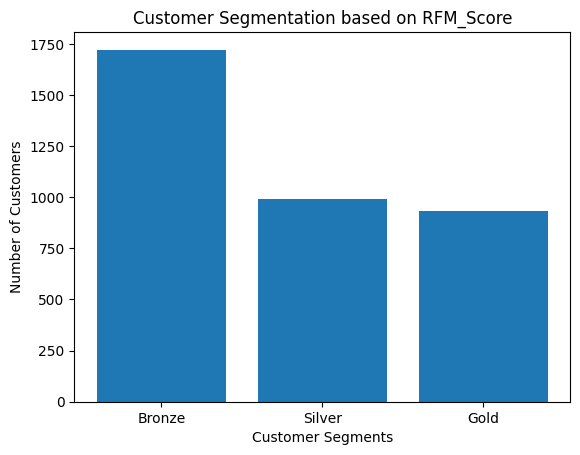

In [ ]:
import matplotlib.pyplot as plt

# Count the number of customers in each 'General_Segment'
segment_counts = datamart['General_Segment'].value_counts()

# Plot the bar graph
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Customer Segments')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation based on RFM_Score')
plt.show()


In [ ]:
# Analyze statistical summaries of RFM parameters for each General_Segment level
datamart.groupby('General_Segment').agg({
    'Recency': 'mean',  # Mean Recency for each General_Segment level
    'Frequency': 'mean',  # Mean Frequency for each General_Segment level
    'MonetaryValue': ['mean', 'count']  # Mean MonetaryValue and count of customers for each General_Segment level
}).round(1)


Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            157.6       5.3         107.4  1721
Gold               14.3      48.4         947.4   931
Silver             45.3      14.2         286.2   991


In some cases, taking multiple trial-and-error attempts to find the right segmentation points can be cumbersome, low-precision, and result in poor business decisions.

K-Means clustering is an ideal machine learning model for customer segmentation without arbitrarily chosen thresholds (as we have been doing so far).

K-Means seeks a balance between having an appropriate commercial customer segmentation and minimizing the error of prediction (SSE).

K-means clustering is one of the most popular, simple, and fast unsupervised machine learning methods.

Key assumptions of k-means clustering regarding variables (R/F/M):

Variables should have symmetric distributions (skewed variables can be managed with logarithmic transformation).
Variables should have the same mean (to ensure equal importance is assigned to each variable).
Variables should have the same variance (to ensure equal importance is assigned to each variable).
 Exploring data for k-means clustering
Steps:

Explore variables with asymmetric distributions - apply logarithmic transformation to them.
Normalize/Standardize variables to have the same mean.
Normalize/Standardize variables to have the same variance.
Store the processed variables as a separate 'array' to be used later for clustering.

In [ ]:
# Filter columns 'Recency', 'Frequency', and 'MonetaryValue' into a new DataFrame
datamart_rfm = datamart[['Recency', 'Frequency', 'MonetaryValue']]

# Perform statistical summary on the 'datamart_rfm' DataFrame
datamart_rfm.describe()


,Recency,Frequency,MonetaryValue
count,3643.00000,3643.000000,3643.000000
mean,90.43563,18.714247,370.694387
std,94.44651,43.754468,1347.443451
min,1.00000,1.000000,0.650000
25%,19.00000,4.000000,58.705000
50%,51.00000,9.000000,136.370000
75%,139.00000,21.000000,334.350000
max,365.00000,1497.000000,48060.350000


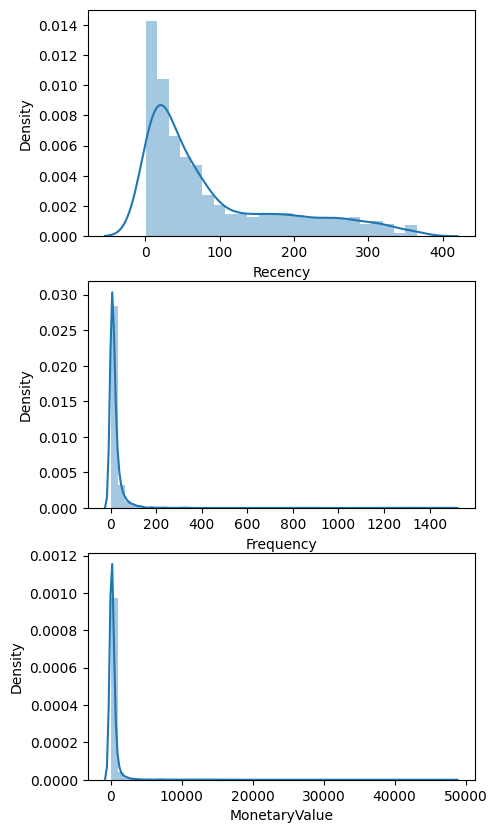

In [ ]:
# Create a vertical layout of three subplots
plt.figure(figsize=(5, 10))
plt.subplot(3, 1, 1)
sns.distplot(datamart_rfm['Recency'])  # Plot distribution of 'Recency'
plt.subplot(3, 1, 2)
sns.distplot(datamart_rfm['Frequency'])  # Plot distribution of 'Frequency'
plt.subplot(3, 1, 3)
sns.distplot(datamart_rfm['MonetaryValue'])  # Plot distribution of 'MonetaryValue'

plt.show()

The output will show three separate plots, each representing the distribution of 'Recency', 'Frequency', and 'MonetaryValue' respectively. These plots help visualize the spread of data for each metric and identify any skewness or patterns in the data.

In [ ]:
# Apply logarithmic transformation to 'datamart_rfm' and store the result in 'datamart_rfm_log'
datamart_rfm_log = np.log(datamart_rfm)

# Perform statistical summary on the 'datamart_rfm_log' DataFrame
datamart_rfm_log.describe()

,Recency,Frequency,MonetaryValue
count,3643.000000,3643.000000,3643.000000
mean,3.806481,2.171902,4.934900
std,1.352631,1.210321,1.310945
min,0.000000,0.000000,-0.430783
25%,2.944439,1.386294,4.072524
50%,3.931826,2.197225,4.915372
75%,4.934474,3.044522,5.812188
max,5.899897,7.311218,10.780213


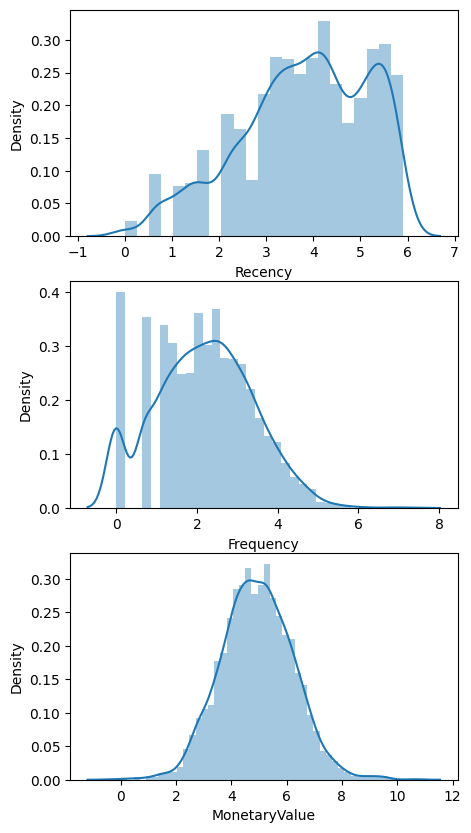

In [ ]:
# Create a vertical layout of three subplots
plt.figure(figsize=(5, 10))
plt.subplot(3, 1, 1)
sns.distplot(datamart_rfm_log['Recency'])  # Plot distribution of log-transformed 'Recency'
plt.subplot(3, 1, 2)
sns.distplot(datamart_rfm_log['Frequency'])  # Plot distribution of log-transformed 'Frequency'
plt.subplot(3, 1, 3)
sns.distplot(datamart_rfm_log['MonetaryValue'])  # Plot distribution of log-transformed 'MonetaryValue'

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize a StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler to the log-transformed data
scaler.fit(datamart_rfm_log)

# Normalize and center the data using the fitted scaler
datamart_rfm_normalized = scaler.transform(datamart_rfm_log)

# Create a DataFrame with normalized values
datamart_rfm_normalized = pd.DataFrame(datamart_rfm_normalized,
                                       index=datamart_rfm_log.index,
                                       columns=datamart_rfm_log.columns)

# Statistical summary of the new DataFrame with normalized variables
datamart_rfm_normalized.describe().round(2)


,Recency,Frequency,MonetaryValue
count,3643.00,3643.00,3643.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-2.81,-1.79,-4.09
25%,-0.64,-0.65,-0.66
50%,0.09,0.02,-0.01
75%,0.83,0.72,0.67
max,1.55,4.25,4.46


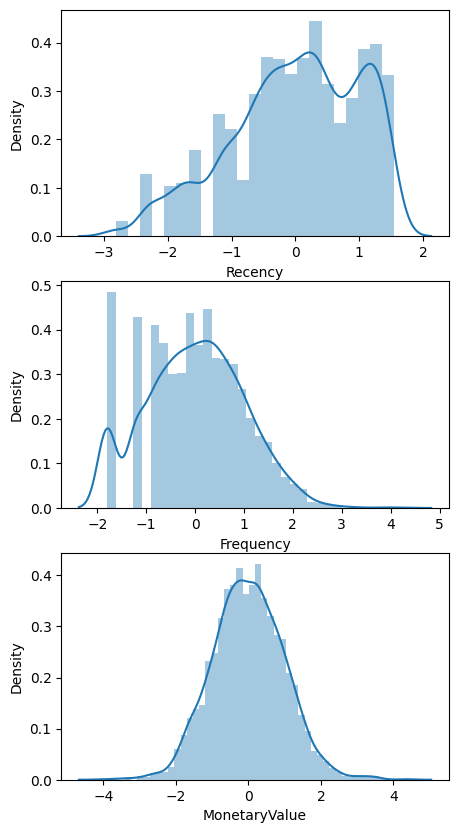

In [ ]:
# Create a vertical layout of three subplots
plt.figure(figsize=(5, 10))
plt.subplot(3, 1, 1)
sns.distplot(datamart_rfm_normalized['Recency'])  # Plot distribution of normalized 'Recency'
plt.subplot(3, 1, 2)
sns.distplot(datamart_rfm_normalized['Frequency'])  # Plot distribution of normalized 'Frequency'
plt.subplot(3, 1, 3)
sns.distplot(datamart_rfm_normalized['MonetaryValue'])  # Plot distribution of normalized 'MonetaryValue'

# Show the plot
plt.show()

# **Model Selection and Training**

In [ ]:
from sklearn.model_selection import train_test_split
# Add the 'Churn' column back to the DataFrame
datamart_rfm_normalized['Churn'] = datamart['Churn']

# Separate the target variable (Churn) from the features
X = datamart_rfm_normalized.drop('Churn', axis=1)
y = datamart_rfm_normalized['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the models and their respective hyperparameter grids for grid search
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.01, 0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 5, 10, 20]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200]})
}

# Train and tune the models using grid search
best_models = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

# Print the best hyperparameters for each model
for model_name, best_model in best_models.items():
    print(f'Best hyperparameters in {model_name}: {best_model.get_params()}')


Best hyperparameters in Logistic Regression: {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best hyperparameters in Decision Tree: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Best hyperparameters in Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_s

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate each model's performance on the testing set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f'{model_name} Performance:')
    print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}')

Logistic Regression Performance:
Accuracy: 0.95, Precision: 0.95, Recall: 0.96, F1-score: 0.95, ROC-AUC: 0.99
Decision Tree Performance:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Random Forest Performance:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Gradient Boosting Performance:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00, ROC-AUC: 1.00


In [ ]:
# Create a DataFrame with the RFM values for the new customer
new_customer_rfm = pd.DataFrame({
    'Recency': [2.5],
    'Frequency': [1.0],
    'MonetaryValue': [-0.5]
})

# Scale the RFM values using the fitted scaler
new_customer_rfm_scaled = scaler.transform(new_customer_rfm)

# Create a DataFrame with the scaled RFM values
new_customer_rfm_scaled = pd.DataFrame(new_customer_rfm_scaled, columns=new_customer_rfm.columns)

# Use the selected model to make the churn prediction
prediction = best_models['Random Forest'].predict(new_customer_rfm_scaled)

# Display the prediction (0: Not churn, 1: Churn)
if prediction[0] == 0:
    print("Prediction: Not Churn")
else:
    print("Prediction: Churn")


Prediction: Churn


# **K_MEANS**
The Elbow criterion is a widely used method to determine the optimal number of clusters (k) in K-Means clustering. It involves plotting the number of clusters against the Sum of Squared Errors (SSE) within the cluster.

Steps to find the optimal number of clusters using the Elbow criterion:

Calculate the SSE for different values of k (number of clusters).
Plot the number of clusters (k) against the SSE.
Identify the "elbow point" on the plot where the SSE decreases at a slower rate, indicating diminishing returns in reducing SSE with more clusters.
Define the "elbow point" as the optimal value of k for K-Means.

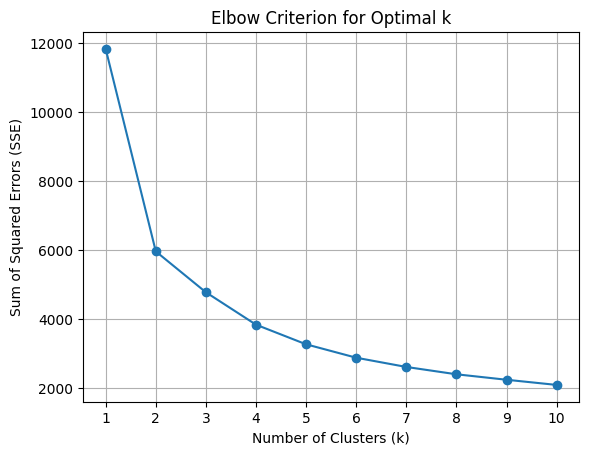

In [ ]:
from sklearn.cluster import KMeans

# Create an empty list to store SSE values for different k values
sse = []

# Try different values of k from 1 to 10
for k in range(1, 11):
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the KMeans model to the normalized data
    kmeans.fit(datamart_rfm_normalized)

    # Append the SSE value for the current k to the list
    sse.append(kmeans.inertia_)

# Plot the number of clusters (k) against the SSE
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Criterion for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


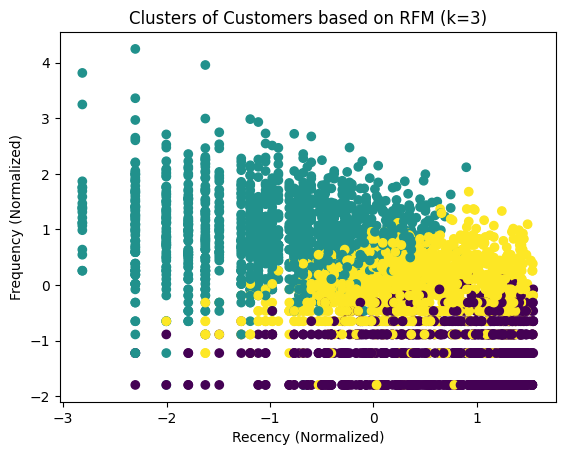

In [ ]:
# Importing required libraries
import matplotlib.pyplot as plt

# Create a KMeans instance with k=3 clusters (as per the elbow method result)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the normalized data
kmeans.fit(datamart_rfm_normalized)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Plot the data points using Recency and Frequency as x and y axes, respectively
plt.scatter(datamart_rfm_normalized.iloc[:, 0], datamart_rfm_normalized.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Recency (Normalized)')
plt.ylabel('Frequency (Normalized)')
plt.title('Clusters of Customers based on RFM (k=3)')
plt.show()


In [ ]:
# Create a DataFrame 'datamart_rfm_k3' with the added 'Cluster' column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)

# Calculate the average RFM values and the number of customers for each cluster
cluster_summary = datamart_rfm_k3.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)

# Display the summary statistics for each cluster
cluster_summary


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         161.0       3.0          44.0   970
1          21.0      40.0         817.0  1296
2         106.0      10.0         181.0  1377

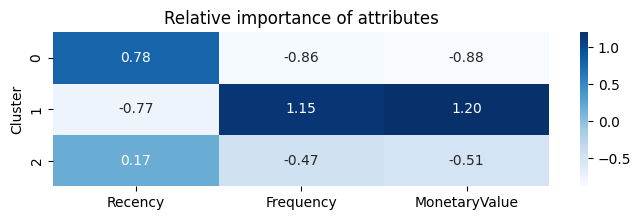

In [ ]:
# Calculate the average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean()

# Calculate the average RFM values for the total population of customers
population_avg = datamart_rfm.mean()

# Calculate the relative importance of each attribute's value in the cluster compared to the population
relative_imp = cluster_avg / population_avg - 1

# Round the relative importance scores to 2 decimal places
relative_imp_rounded = relative_imp.round(2)

# Plot the heatmap
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp_rounded, annot=True, fmt='.2f', cmap='Blues')

# Show the plot
plt.show()


# **check and concat**

In [ ]:
DATA_.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom,2011-10-01,2011-04-01,6,12.60
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom,2011-11-01,2011-09-01,2,1.45
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom,2011-07-01,2011-07-01,0,22.50
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom,2011-11-01,2011-11-01,0,2.10
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom,2011-05-01,2011-02-01,3,17.85


In [ ]:
datamart_rfm_normalized.head()

,Recency,Frequency,MonetaryValue,Churn
CustomerID,,,,
12747,-2.002202,0.865157,1.464940,0
12748,-2.814518,3.815272,2.994692,0
12749,-1.789490,1.189117,1.347598,0
12820,-1.789490,0.546468,0.500595,0
12822,0.337315,0.020925,0.037943,1


In [ ]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Decile,Churn,Churn_Segment,RFM_Segment,General_Segment
CustomerID,,,,,,,,,,,,
12747,3,25,948.70,4,4,4,4.0,8,0,Champions,444,Gold
12748,1,888,7046.16,4,4,4,4.0,8,0,Champions,444,Gold
12749,4,37,813.45,4,4,4,4.0,8,0,Champions,444,Gold
12820,4,17,268.02,4,3,3,3.5,7,0,Promising,433,Gold
12822,71,9,146.15,2,2,3,2.2,3,1,Potential,223,Bronze


In [ ]:
# Check for missing values in 'datamart'
print(datamart.isnull().sum())

# Check for missing values in 'datamart_rfm_normalized'
print(datamart_rfm_normalized.isnull().sum())

# Check for missing values in 'DATA_'
print(DATA_.isnull().sum())


Recency            0
Frequency          0
MonetaryValue      0
R                  0
F                  0
M                  0
RFM_Score          0
RFM_Decile         0
Churn              0
Churn_Segment      0
RFM_Segment        0
General_Segment    0
dtype: int64
Recency          0
Frequency        0
MonetaryValue    0
Churn            0
dtype: int64
Unnamed: 0      0
InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
InvoiceMonth    0
CohortMonth     0
CohortIndex     0
TotalSum        0
dtype: int64


In [ ]:
# Concatenate along columns (axis=1)
final_data = pd.concat([datamart, datamart_rfm_normalized, DATA_], axis=1)

# If the DataFrames have different indices, you can reset the index after concatenation
final_data.reset_index(inplace=True, drop=True)

# Now, the 'final_data' DataFrame contains the combined data without missing values
final_data.head()


,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Decile,Churn,Churn_Segment,...,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,3.0,25.0,948.70,4,4,4,4.0,8.0,0.0,Champions,...,GLITTER HANGING BUTTERFLY STRING,4,2011-11-22,2.10,15311,United Kingdom,2011-11-01,2010-12-01,11,8.40
1,1.0,888.0,7046.16,4,4,4,4.0,8.0,0.0,Champions,...,WHITE WOOD GARDEN PLANT LADDER,2,2011-01-06,9.95,13187,United Kingdom,2011-01-01,2011-01-01,0,19.90
2,4.0,37.0,813.45,4,4,4,4.0,8.0,0.0,Champions,...,JUMBO BAG PINK POLKADOT,2,2011-06-14,2.08,18283,United Kingdom,2011-06-01,2011-01-01,5,4.16
3,4.0,17.0,268.02,4,3,3,3.5,7.0,0.0,Promising,...,JUMBO BAG ALPHABET,10,2011-04-15,2.08,13048,United Kingdom,2011-04-01,2011-01-01,3,20.80
4,71.0,9.0,146.15,2,2,3,2.2,3.0,1.0,Potential,...,LUNCH BAG ALPHABET DESIGN,3,2011-08-16,1.65,16713,United Kingdom,2011-08-01,2010-12-01,8,4.95


In [ ]:
# Assuming 'final_data' is the DataFrame that you want to download
#final_data.to_csv('/content/final_data.csv', index=False)
